# Feature Enginering - modelga yordam beradigan yangi featurelarni yaratish, o`zgartirish yoki kombinatsiya qilish

# transformatsiya -- modelga kiradigan belgilarni o`zgartirib ularni yanada tushunarli barqaror va modlega mos holga keltirish  

In [ ]:
# transformatsiya turlari  
# 1) Log transform 
# 2) square root transform 
# 3) Box -Cox - Transform 
# 4) Yeo _Johnson Transform 

In [2]:
import pandas as pd 
df = pd.read_csv(r"C:\Users\Jahongir\desktop\practise\Data\Row_Data\autos.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [22]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,price_log
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,9.510149
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,9.711176
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,9.711176
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.4,10.0,102,5500,24,30,13950,9.543306
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.4,8.0,115,5500,18,22,17450,9.767152


In [15]:
print(df.price.head(11))

0     13495
1     16500
2     16500
3     13950
4     17450
5     15250
6     17710
7     18920
8     23875
9         ?
10    16430
Name: price, dtype: object


In [18]:
import pandas as pd
import numpy as np

# 1. '?' belgisini NaN (bo'sh qiymat) bilan almashtiramiz
df['price'] = df['price'].replace('?', np.nan)

# 2. Ustunni raqam (float) turiga o'tkazamiz
# errors='coerce' ham '?' kabi xatolarni NaN qilib ketadi
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# 3. Bo'sh qolgan joylarni (NaN) o'rtacha qiymat yoki 0 bilan to'ldiramiz
# (Chunki NaN bo'lsa, int64 ga o'tkazib bo'lmaydi)
mean_price = df['price'].mean()
df['price'] = df['price'].fillna(mean_price).astype('int64')

print(df['price'].dtype)

int64


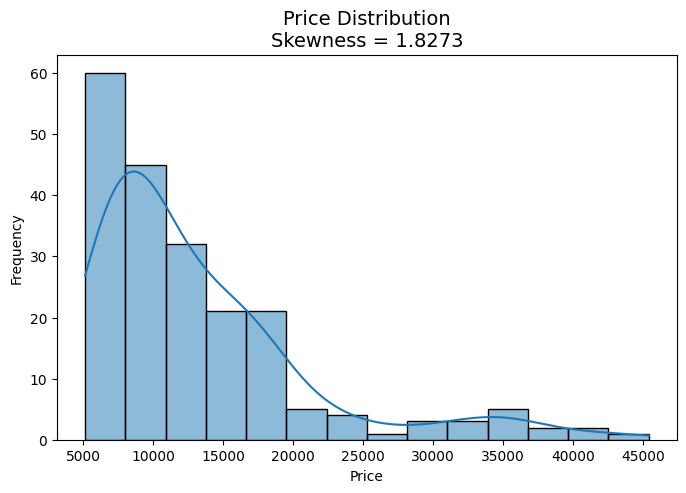

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))

# Histogram + KDE
sns.histplot(df["price"], kde=True)

# Skewnessni hisoblash
sk = df["price"].skew()

# Grafikga yozuv qo‘yish
plt.title(f"Price Distribution\nSkewness = {sk:.4f}", fontsize=14)
plt.xlabel("Price")
plt.ylabel("Frequency")

plt.show()


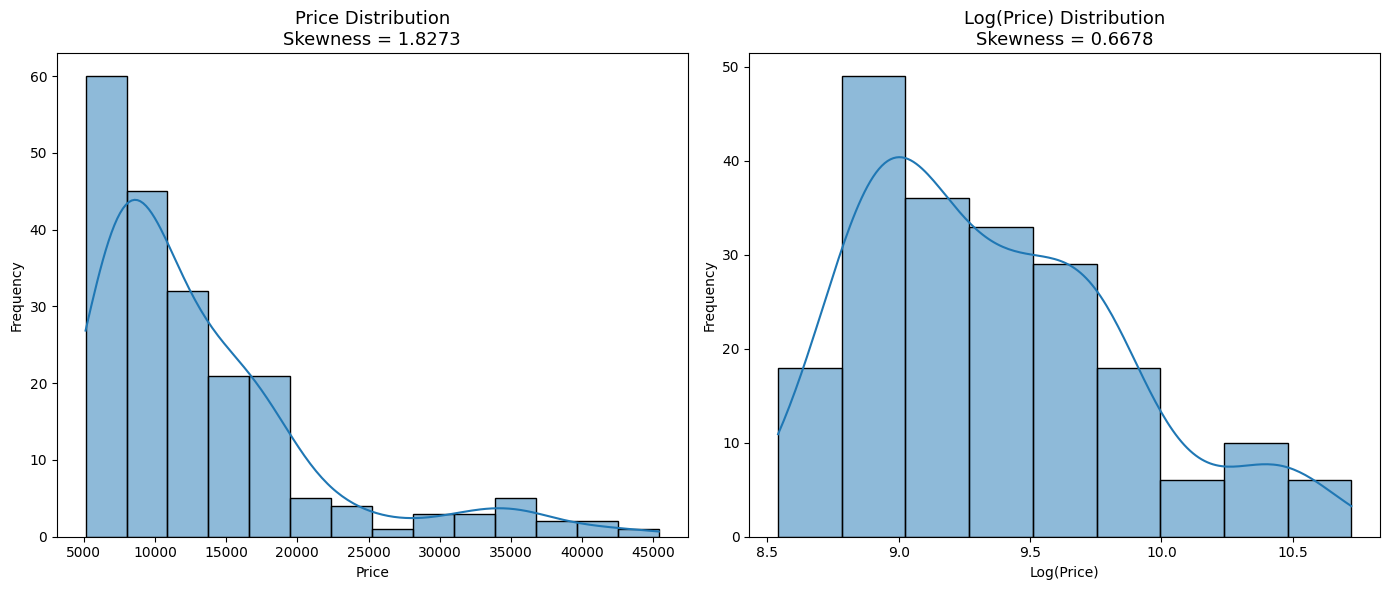

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Log transform qo‘llash
df["price_log"] = np.log(df["price"] + 1)

# Skewnesslarni hisoblash
sk1 = df["price"].skew()
sk2 = df["price_log"].skew()

plt.figure(figsize=(14,6))

# --- 1-grafik: Price ---
plt.subplot(1, 2, 1)
sns.histplot(df["price"], kde=True)
plt.title(f"Price Distribution\nSkewness = {sk1:.4f}", fontsize=13)
plt.xlabel("Price")
plt.ylabel("Frequency")

# --- 2-grafik: Log(Price) ---
plt.subplot(1, 2, 2)
sns.histplot(df["price_log"], kde=True)
plt.title(f"Log(Price) Distribution\nSkewness = {sk2:.4f}", fontsize=13)
plt.xlabel("Log(Price)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [23]:
import pandas as pd

# Faqat sonli ustunlarni olish
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Har bir numeric ustun uchun skewness hisoblash
skew_values = numeric_cols.skew()

print(skew_values)


symboling            0.211072
wheel-base           1.050214
length               0.155954
width                0.904003
height               0.063123
curb-weight          0.681398
engine-size          1.947655
compression-ratio    2.610862
city-mpg             0.663704
highway-mpg          0.539997
price                1.827325
price_log            0.667809
dtype: float64


In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer

df = df.copy()

# Faqat numeric ustunlar
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

# Skewness hisoblash
skew_values = df[numeric_cols].skew()

# Strongly skewed (|skew| > 1) ustunlarni tanlash
skewed_features = skew_values[skew_values.abs() > 1].index.tolist()
print("Strongly skewed features:", skewed_features)

# Box-Cox faqat musbat qiymatlar bilan ishlaydi
pt_boxcox = PowerTransformer(method='box-cox', standardize=False)  # standardize=False → scale qilmaydi
pt_yeoj = PowerTransformer(method='yeo-johnson', standardize=False) # yeo-johnson ± qiymatlarni qamrab oladi

for feat in skewed_features:
    col_data = df[feat].copy()
    
    # Log transform: faqat musbat qiymatlar uchun
    if (col_data <= 0).any():
        # 0 yoki manfiy bo‘lsa log(x+1)
        df[feat + '_log'] = np.log1p(col_data - col_data.min() + 1)
    else:
        df[feat + '_log'] = np.log(col_data)
    
    # Box-Cox transform: faqat musbat qiymatlar
    if (col_data <= 0).any():
        print(f"Skipping Box-Cox for {feat} (non-positive values)")
    else:
        df[feat + '_boxcox'] = pt_boxcox.fit_transform(col_data.values.reshape(-1,1))
    
    # Yeo-Johnson: barcha qiymatlar bilan ishlaydi
    df[feat + '_yeoj'] = pt_yeoj.fit_transform(col_data.values.reshape(-1,1))

# Natija: df endi skewed ustunlar + 3 transform variantlarni o'z ichiga oladi
print("Transformatsiya tugadi! Skewed ustunlar yangi columnlarda qo‘shildi.")

Strongly skewed features: ['wheel-base', 'engine-size', 'compression-ratio', 'price']
Transformatsiya tugadi! Skewed ustunlar yangi columnlarda qo‘shildi.


In [25]:
import pandas as pd

# Faqat numeric ustunlar
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

# 1️⃣ Original skewness
original_skew = df[numeric_cols].skew().rename("skew_before")

# 2️⃣ Transform qilingan skewness (log/boxcox/yeoj ustunlar)
# Transform ustunlar log, boxcox, yeoj bilan tugaganini aniqlaymiz
transformed_cols = [c for c in df.columns if c.endswith(("_log","_boxcox","_yeoj"))]

transformed_skew = df[transformed_cols].skew().rename("skew_after")

# 3️⃣ Jadvalga birlashtirish
skew_compare = pd.concat([original_skew, transformed_skew], axis=1).fillna("-")
skew_compare = skew_compare.sort_values(by="skew_before", ascending=False)

print(skew_compare)


                          skew_before skew_after
compression-ratio            2.610862          -
compression-ratio_log        2.349716   2.349716
engine-size                  1.947655          -
price                        1.827325          -
wheel-base                   1.050214          -
width                        0.904003          -
wheel-base_log               0.883387   0.883387
engine-size_log              0.857828   0.857828
curb-weight                  0.681398          -
price_log                    0.667731   0.667731
city-mpg                     0.663704          -
highway-mpg                  0.539997          -
symboling                    0.211072          -
length                       0.155954          -
price_yeoj                   0.085775   0.085775
price_boxcox                 0.085760    0.08576
height                       0.063123          -
compression-ratio_yeoj       0.034222   0.034222
compression-ratio_boxcox     0.008026   0.008026
wheel-base_yeoj     